## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [1]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Weights and biases for each layer
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)  # Input to Hidden layer
        self.bias_hidden = np.zeros((1, self.hidden_size))
        
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)  # Hidden to Output layer
        self.bias_output = np.zeros((1, self.output_size))
        
    def forward(self, X):
        # Forward propagation
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)  # Hidden layer activation
        
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)  # Output layer activation (for binary classification)
        
        return self.output

    def compute_loss(self, y_true, y_pred):
        # Mean Squared Error loss function (for regression)
        return np.mean((y_true - y_pred) ** 2)
    
    def backward(self, X, y_true, learning_rate=0.01):
        # Backward propagation (Gradient Descent)
        
        # Output layer error and gradient
        output_error = y_true - self.output
        output_delta = output_error * sigmoid_derivative(self.output)
        
        # Hidden layer error and gradient
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * relu_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# Example usage:
input_size = 3  # Example: 3 input features
hidden_size = 4  # Hidden layer with 4 neurons
output_size = 1  # Output layer (1 neuron for binary classification)

# Initialize the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Example input data (X) and labels (y)
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])
y = np.array([[0], [1], [0]])

# Forward propagation
output = nn.forward(X)
print("Output after forward propagation:")
print(output)

# Compute loss
loss = nn.compute_loss(y, output)
print(f"Loss: {loss}")

# Backpropagation (for a single training step)
nn.backward(X, y, learning_rate=0.1)

# Output after one training step
output_after_training = nn.forward(X)
print("Output after one training step:")
print(output_after_training)


Output after forward propagation:
[[0.49548103]
 [0.52211112]
 [0.54861611]]
Loss: 0.2582862899438419
Output after one training step:
[[0.48497748]
 [0.50800092]
 [0.53099047]]


## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


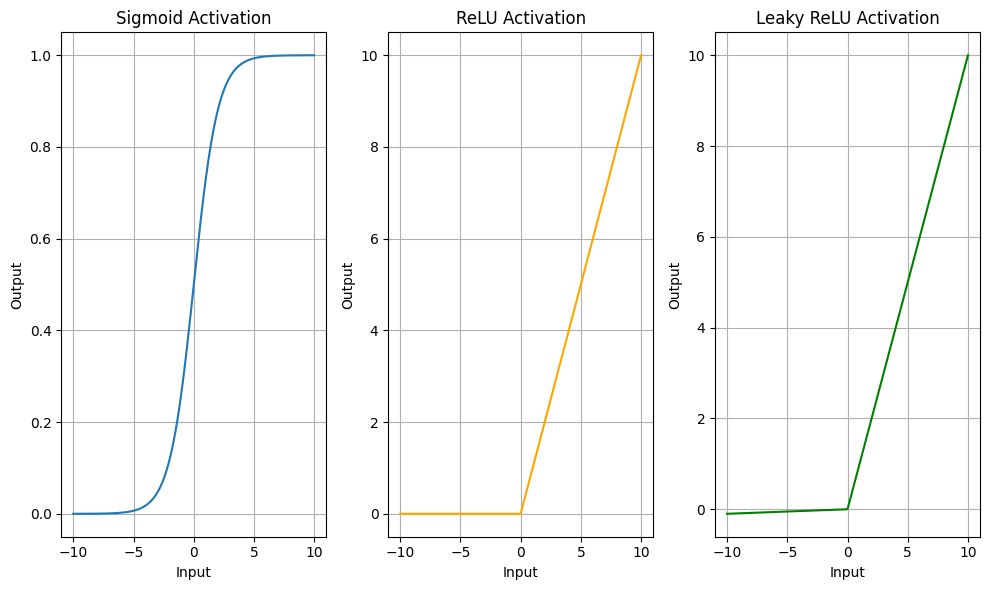

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate a range of inputs from -10 to 10
x = np.linspace(-10, 10, 400)

# Apply each activation function
sigmoid_output = sigmoid(x)
relu_output = relu(x)
leaky_relu_output = leaky_relu(x)

# Plotting the activation functions
plt.figure(figsize=(10, 6))

# Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid_output, label="Sigmoid")
plt.title("Sigmoid Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# ReLU
plt.subplot(1, 3, 2)
plt.plot(x, relu_output, label="ReLU", color='orange')
plt.title("ReLU Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# Leaky ReLU
plt.subplot(1, 3, 3)
plt.plot(x, leaky_relu_output, label="Leaky ReLU", color='green')
plt.title("Leaky ReLU Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [3]:
import numpy as np

# Activation function: ReLU for the hidden layer, Sigmoid for the output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Weights and biases for each layer
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)  # Input to Hidden layer
        self.bias_hidden = np.zeros((1, self.hidden_size))
        
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)  # Hidden to Output layer
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward propagation
        
        # Input to Hidden Layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)  # Apply ReLU activation to hidden layer
        
        # Hidden to Output Layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)  # Apply Sigmoid activation to output layer
        
        return self.output

# Example usage
input_size = 3  # Example: 3 input features
hidden_size = 4  # Hidden layer with 4 neurons
output_size = 1  # Output layer (1 neuron for binary classification)

# Initialize the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Example input data (3 samples, each with 3 features)
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])

# Perform forward propagation
output = nn.forward(X)
print("Output after forward propagation:")
print(output)


Output after forward propagation:
[[0.58485541]
 [0.68813456]
 [0.77574948]]


## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [4]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lambda_reg=0.01):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lambda_reg = lambda_reg  # Regularization strength
        
        # Weights and biases for each layer
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)  # Input to Hidden layer
        self.bias_hidden = np.zeros((1, self.hidden_size))
        
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)  # Hidden to Output layer
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward propagation
        
        # Input to Hidden Layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)  # Apply ReLU activation to hidden layer
        
        # Hidden to Output Layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)  # Apply Sigmoid activation to output layer
        
        return self.output

    def compute_loss(self, y_true, y_pred):
        # Mean Squared Error (MSE) loss
        mse_loss = np.mean((y_true - y_pred) ** 2)
        
        # L2 Regularization term (sum of squared weights)
        l2_loss = self.lambda_reg * (np.sum(self.weights_input_hidden ** 2) + np.sum(self.weights_hidden_output ** 2))
        
        # Total loss = MSE + L2 regularization
        total_loss = mse_loss + l2_loss
        
        return total_loss

    def backward(self, X, y_true, learning_rate=0.01):
        # Backward propagation (Gradient Descent)
        
        # Output layer error and gradient
        output_error = y_true - self.output
        output_delta = output_error * sigmoid(self.output) * (1 - sigmoid(self.output))
        
        # Hidden layer error and gradient
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * (self.hidden_output > 0)  # Derivative of ReLU
        
        # Update weights and biases (including regularization)
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
        
        # L2 Regularization: update weights with the penalty term
        self.weights_hidden_output -= self.lambda_reg * self.weights_hidden_output * learning_rate
        self.weights_input_hidden -= self.lambda_reg * self.weights_input_hidden * learning_rate

# Example usage
input_size = 3  # Example: 3 input features
hidden_size = 4  # Hidden layer with 4 neurons
output_size = 1  # Output layer (1 neuron for binary classification)

# Initialize the neural network with L2 regularization
nn = NeuralNetwork(input_size, hidden_size, output_size, lambda_reg=0.01)

# Example input data (3 samples, each with 3 features)
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])

# Example labels (binary classification)
y = np.array([[0], [1], [0]])

# Perform forward propagation
output = nn.forward(X)
print("Output after forward propagation:")
print(output)

# Compute the loss including L2 regularization
loss = nn.compute_loss(y, output)
print(f"Loss with L2 regularization: {loss}")

# Perform backward propagation (one training step)
nn.backward(X, y, learning_rate=0.1)

# Output after one training step
output_after_training = nn.forward(X)
print("Output after one training step:")
print(output_after_training)


Output after forward propagation:
[[0.51718437]
 [0.51138894]
 [0.50559044]]
Loss with L2 regularization: 0.3482398896453753
Output after one training step:
[[0.51284954]
 [0.50666005]
 [0.50046852]]


## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [1]:
import numpy as np

# Sigmoid activation function with overflow prevention
def sigmoid(x):
    x = np.clip(x, -20, 20)  # Clamp x to prevent overflow
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (used in backpropagation)
def sigmoid_derivative(x):
    sig = sigmoid(x)  # Calculate sigmoid value
    return sig * (1 - sig)

# ReLU activation function (no overflow issues)
def relu(x):
    return np.maximum(0, x)

# ReLU derivative (used in backpropagation)
def relu_derivative(x):
    return (x > 0).astype(float)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lambda_reg=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lambda_reg = lambda_reg  # Regularization strength
        self.beta1 = beta1  # Decay rate for first moment estimate
        self.beta2 = beta2  # Decay rate for second moment estimate
        self.epsilon = epsilon  # Small constant for numerical stability
        
        # Weights and biases for each layer
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)  # Input to Hidden layer
        self.bias_hidden = np.zeros((1, self.hidden_size))
        
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)  # Hidden to Output layer
        self.bias_output = np.zeros((1, self.output_size))
        
        # Adam optimizer variables (initialized to 0)
        self.m_w_input_hidden = np.zeros_like(self.weights_input_hidden)
        self.v_w_input_hidden = np.zeros_like(self.weights_input_hidden)
        self.m_b_hidden = np.zeros_like(self.bias_hidden)
        self.v_b_hidden = np.zeros_like(self.bias_hidden)

        self.m_w_hidden_output = np.zeros_like(self.weights_hidden_output)
        self.v_w_hidden_output = np.zeros_like(self.weights_hidden_output)
        self.m_b_output = np.zeros_like(self.bias_output)
        self.v_b_output = np.zeros_like(self.bias_output)

    def forward(self, X):
        # Forward propagation
        
        # Input to Hidden Layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)  # Apply ReLU activation to hidden layer
        
        # Hidden to Output Layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)  # Apply Sigmoid activation to output layer
        
        return self.output

    def compute_loss(self, y_true, y_pred):
        # Mean Squared Error (MSE) loss
        mse_loss = np.mean((y_true - y_pred) ** 2)
        
        # L2 Regularization term (sum of squared weights)
        l2_loss = self.lambda_reg * (np.sum(self.weights_input_hidden ** 2) + np.sum(self.weights_hidden_output ** 2))
        
        # Total loss = MSE + L2 regularization
        total_loss = mse_loss + l2_loss
        
        return total_loss

    def backward(self, X, y_true):
        # Backward propagation (Gradient Descent)
        
        # Output layer error and gradient
        output_error = y_true - self.output
        output_delta = output_error * sigmoid_derivative(self.output_input)
        
        # Hidden layer error and gradient
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * relu_derivative(self.hidden_input)  # Derivative of ReLU
        
        # Gradients for weights and biases
        grad_weights_hidden_output = self.hidden_output.T.dot(output_delta)
        grad_bias_output = np.sum(output_delta, axis=0, keepdims=True)
        
        grad_weights_input_hidden = X.T.dot(hidden_delta)
        grad_bias_hidden = np.sum(hidden_delta, axis=0, keepdims=True)
        
        # L2 Regularization: gradients for weights
        grad_weights_hidden_output += 2 * self.lambda_reg * self.weights_hidden_output
        grad_weights_input_hidden += 2 * self.lambda_reg * self.weights_input_hidden
        
        return grad_weights_input_hidden, grad_bias_hidden, grad_weights_hidden_output, grad_bias_output

    def update_weights(self, grad_weights_input_hidden, grad_bias_hidden, grad_weights_hidden_output, grad_bias_output, learning_rate=0.001):
        # Update weights using Adam optimizer
        
        # Update for Input to Hidden layer weights
        self.m_w_input_hidden = self.beta1 * self.m_w_input_hidden + (1 - self.beta1) * grad_weights_input_hidden
        self.v_w_input_hidden = self.beta2 * self.v_w_input_hidden + (1 - self.beta2) * (grad_weights_input_hidden ** 2)
        m_w_input_hidden_hat = self.m_w_input_hidden / (1 - self.beta1)
        v_w_input_hidden_hat = self.v_w_input_hidden / (1 - self.beta2)
        self.weights_input_hidden -= learning_rate * m_w_input_hidden_hat / (np.sqrt(v_w_input_hidden_hat) + self.epsilon)

        self.m_b_hidden = self.beta1 * self.m_b_hidden + (1 - self.beta1) * grad_bias_hidden
        self.v_b_hidden = self.beta2 * self.v_b_hidden + (1 - self.beta2) * (grad_bias_hidden ** 2)
        m_b_hidden_hat = self.m_b_hidden / (1 - self.beta1)
        v_b_hidden_hat = self.v_b_hidden / (1 - self.beta2)
        self.bias_hidden -= learning_rate * m_b_hidden_hat / (np.sqrt(v_b_hidden_hat) + self.epsilon)

        # Update for Hidden to Output layer weights
        self.m_w_hidden_output = self.beta1 * self.m_w_hidden_output + (1 - self.beta1) * grad_weights_hidden_output
        self.v_w_hidden_output = self.beta2 * self.v_w_hidden_output + (1 - self.beta2) * (grad_weights_hidden_output ** 2)
        m_w_hidden_output_hat = self.m_w_hidden_output / (1 - self.beta1)
        v_w_hidden_output_hat = self.v_w_hidden_output / (1 - self.beta2)
        self.weights_hidden_output -= learning_rate * m_w_hidden_output_hat / (np.sqrt(v_w_hidden_output_hat) + self.epsilon)

        self.m_b_output = self.beta1 * self.m_b_output + (1 - self.beta1) * grad_bias_output
        self.v_b_output = self.beta2 * self.v_b_output + (1 - self.beta2) * (grad_bias_output ** 2)
        m_b_output_hat = self.m_b_output / (1 - self.beta1)
        v_b_output_hat = self.v_b_output / (1 - self.beta2)
        self.bias_output -= learning_rate * m_b_output_hat / (np.sqrt(v_b_output_hat) + self.epsilon)

# Training the neural network with Adam optimizer
def train_nn_with_adam(nn, X, y, epochs=1000, learning_rate=0.001):
    for epoch in range(epochs):
        # Forward pass
        y_pred = nn.forward(X)
        
        # Compute loss
        loss = nn.compute_loss(y, y_pred)
        
        # Backward pass (calculate gradients)
        grad_weights_input_hidden, grad_bias_hidden, grad_weights_hidden_output, grad_bias_output = nn.backward(X, y)
        
        # Update weights using Adam optimizer
        nn.update_weights(grad_weights_input_hidden, grad_bias_hidden, grad_weights_hidden_output, grad_bias_output, learning_rate)
        
        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}")

# Example usage
input_size = 3  # Example: 3 input features
hidden_size = 4  # Hidden layer with 4 neurons
output_size = 1  # Output layer (1 neuron for binary classification)

# Initialize the neural network with Adam optimizer
nn = NeuralNetwork(input_size, hidden_size, output_size, lambda_reg=0.01)

# Example input data (3 samples, each with 3 features)
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])

# Example labels (binary classification)
y = np.array([[0], [1], [0]])

# Train the neural network using Adam optimizer
train_nn_with_adam(nn, X, y, epochs=1000, learning_rate=0.001)

# Final output after training
output_after_training = nn.forward(X)
print("Output after training:")
print(output_after_training)


Epoch 0/1000, Loss: 0.6450537316953229
Epoch 100/1000, Loss: 0.8349012692629962
Epoch 200/1000, Loss: 0.8481806259881338
Epoch 300/1000, Loss: 0.8476903050590522
Epoch 400/1000, Loss: 0.84365146752731
Epoch 500/1000, Loss: 0.8384385513648043
Epoch 600/1000, Loss: 0.8328329842220306
Epoch 700/1000, Loss: 0.8271384728051211
Epoch 800/1000, Loss: 0.8214852566657135
Epoch 900/1000, Loss: 0.8159317631151346
Output after training:
[[0.97764622]
 [0.99413874]
 [0.99847377]]


## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [6]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lambda_reg=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lambda_reg = lambda_reg  # Regularization strength
        self.beta1 = beta1  # Decay rate for first moment estimate
        self.beta2 = beta2  # Decay rate for second moment estimate
        self.epsilon = epsilon  # Small constant for numerical stability
        
        # Weights and biases for each layer
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)  # Input to Hidden layer
        self.bias_hidden = np.zeros((1, self.hidden_size))
        
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)  # Hidden to Output layer
        self.bias_output = np.zeros((1, self.output_size))
        
        # Adam optimizer variables (initialized to 0)
        self.m_w_input_hidden = np.zeros_like(self.weights_input_hidden)
        self.v_w_input_hidden = np.zeros_like(self.weights_input_hidden)
        self.m_b_hidden = np.zeros_like(self.bias_hidden)
        self.v_b_hidden = np.zeros_like(self.bias_hidden)

        self.m_w_hidden_output = np.zeros_like(self.weights_hidden_output)
        self.v_w_hidden_output = np.zeros_like(self.weights_hidden_output)
        self.m_b_output = np.zeros_like(self.bias_output)
        self.v_b_output = np.zeros_like(self.bias_output)

    def forward(self, X):
        # Forward propagation
        
        # Input to Hidden Layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)  # Apply ReLU activation to hidden layer
        
        # Hidden to Output Layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)  # Apply Sigmoid activation to output layer
        
        return self.output

    def compute_loss(self, y_true, y_pred):
        # Mean Squared Error (MSE) loss
        mse_loss = np.mean((y_true - y_pred) ** 2)
        
        # L2 Regularization term (sum of squared weights)
        l2_loss = self.lambda_reg * (np.sum(self.weights_input_hidden ** 2) + np.sum(self.weights_hidden_output ** 2))
        
        # Total loss = MSE + L2 regularization
        total_loss = mse_loss + l2_loss
        
        return total_loss

    def backward(self, X, y_true):
        # Backward propagation (Gradient Descent)
        
        # Output layer error and gradient
        output_error = y_true - self.output
        output_delta = output_error * sigmoid(self.output) * (1 - sigmoid(self.output))
        
        # Hidden layer error and gradient
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * (self.hidden_output > 0)  # Derivative of ReLU
        
        # Gradients for weights and biases
        grad_weights_hidden_output = self.hidden_output.T.dot(output_delta)
        grad_bias_output = np.sum(output_delta, axis=0, keepdims=True)
        
        grad_weights_input_hidden = X.T.dot(hidden_delta)
        grad_bias_hidden = np.sum(hidden_delta, axis=0, keepdims=True)
        
        # L2 Regularization: gradients for weights
        grad_weights_hidden_output += 2 * self.lambda_reg * self.weights_hidden_output
        grad_weights_input_hidden += 2 * self.lambda_reg * self.weights_input_hidden
        
        return grad_weights_input_hidden, grad_bias_hidden, grad_weights_hidden_output, grad_bias_output

    def update_weights(self, grad_weights_input_hidden, grad_bias_hidden, grad_weights_hidden_output, grad_bias_output, learning_rate=0.001):
        # Update weights using Adam optimizer
        
        # Update for Input to Hidden layer weights
        self.m_w_input_hidden = self.beta1 * self.m_w_input_hidden + (1 - self.beta1) * grad_weights_input_hidden
        self.v_w_input_hidden = self.beta2 * self.v_w_input_hidden + (1 - self.beta2) * (grad_weights_input_hidden ** 2)
        m_w_input_hidden_hat = self.m_w_input_hidden / (1 - self.beta1)
        v_w_input_hidden_hat = self.v_w_input_hidden / (1 - self.beta2)
        self.weights_input_hidden -= learning_rate * m_w_input_hidden_hat / (np.sqrt(v_w_input_hidden_hat) + self.epsilon)

        self.m_b_hidden = self.beta1 * self.m_b_hidden + (1 - self.beta1) * grad_bias_hidden
        self.v_b_hidden = self.beta2 * self.v_b_hidden + (1 - self.beta2) * (grad_bias_hidden ** 2)
        m_b_hidden_hat = self.m_b_hidden / (1 - self.beta1)
        v_b_hidden_hat = self.v_b_hidden / (1 - self.beta2)
        self.bias_hidden -= learning_rate * m_b_hidden_hat / (np.sqrt(v_b_hidden_hat) + self.epsilon)

        # Update for Hidden to Output layer weights
        self.m_w_hidden_output = self.beta1 * self.m_w_hidden_output + (1 - self.beta1) * grad_weights_hidden_output
        self.v_w_hidden_output = self.beta2 * self.v_w_hidden_output + (1 - self.beta2) * (grad_weights_hidden_output ** 2)
        m_w_hidden_output_hat = self.m_w_hidden_output / (1 - self.beta1)
        v_w_hidden_output_hat = self.v_w_hidden_output / (1 - self.beta2)
        self.weights_hidden_output -= learning_rate * m_w_hidden_output_hat / (np.sqrt(v_w_hidden_output_hat) + self.epsilon)

        self.m_b_output = self.beta1 * self.m_b_output + (1 - self.beta1) * grad_bias_output
        self.v_b_output = self.beta2 * self.v_b_output + (1 - self.beta2) * (grad_bias_output ** 2)
        m_b_output_hat = self.m_b_output / (1 - self.beta1)
        v_b_output_hat = self.v_b_output / (1 - self.beta2)
        self.bias_output -= learning_rate * m_b_output_hat / (np.sqrt(v_b_output_hat) + self.epsilon)

# Training the neural network with Adam optimizer
def train_nn_with_adam(nn, X, y, epochs=1000, learning_rate=0.001):
    for epoch in range(epochs):
        # Forward pass
        y_pred = nn.forward(X)
        
        # Compute loss
        loss = nn.compute_loss(y, y_pred)
        
        # Backward pass (calculate gradients)
        grad_weights_input_hidden, grad_bias_hidden, grad_weights_hidden_output, grad_bias_output = nn.backward(X, y)
        
        # Update weights using Adam optimizer
        nn.update_weights(grad_weights_input_hidden, grad_bias_hidden, grad_weights_hidden_output, grad_bias_output, learning_rate)
        
        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}")

# Example usage
input_size = 3  # Example: 3 input features
hidden_size = 4  # Hidden layer with 4 neurons
output_size = 1  # Output layer (1 neuron for binary classification)

# Initialize the neural network with Adam optimizer
nn = NeuralNetwork(input_size, hidden_size, output_size, lambda_reg=0.01)

# Example input data (3 samples, each with 3 features)
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])

# Example labels (binary classification)
y = np.array([[0], [1], [0]])

# Train the neural network using Adam optimizer
train_nn_with_adam(nn, X, y, epochs=1000, learning_rate=0.001)

# Final output after training
output_after_training = nn.forward(X)
print("Output after training:")
print(output_after_training)


Epoch 0/1000, Loss: 0.7048434904953325
Epoch 100/1000, Loss: 0.7825091368354644
Epoch 200/1000, Loss: 0.8112859853070922
Epoch 300/1000, Loss: 0.8271145124472417
Epoch 400/1000, Loss: 0.8373385452356564
Epoch 500/1000, Loss: 0.8446857035103422
Epoch 600/1000, Loss: 0.8504472793517658
Epoch 700/1000, Loss: 0.8553137178544239
Epoch 800/1000, Loss: 0.8596818775802693
Epoch 900/1000, Loss: 0.8637907032252363
Output after training:
[[0.99642696]
 [0.99982253]
 [0.99999121]]
